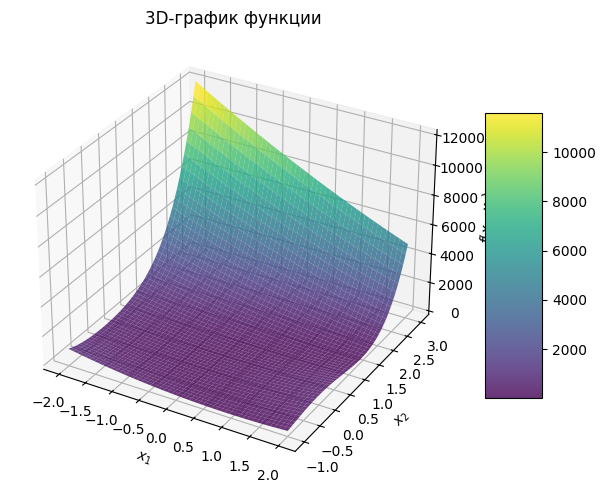

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции
def f(x1, x2):
    return 100 * (x1 - x2**2)**2 + (x1**2 - x2)**2

# Создание сетки значений x1 и x2
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)



# Построение 3D-графика
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_title('3D-график функции', fontsize=12)
ax1.set_xlabel('$x_1$', fontsize=10)
ax1.set_ylabel('$x_2$', fontsize=10)
ax1.set_zlabel('$f(x_1, x_2)$', fontsize=10)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)



plt.tight_layout()
plt.show()

Минимум достигается в точке: [-1.63908657e-07  1.91381436e-08]
Значение функции в этой точке: 2.6869710692823907e-12
Количество итераций: 124


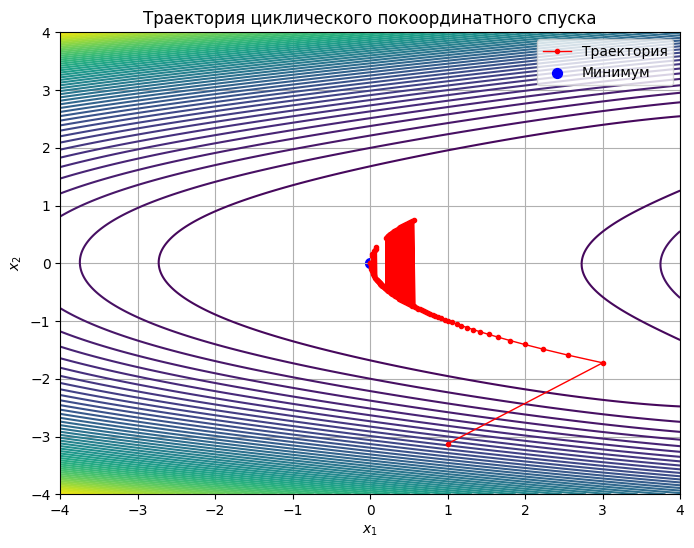

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Целевая функция
def f(x1, x2):
    return 100 * (x1 - x2**2)**2 + (x1**2 - x2)**2

# Метод золотого сечения
def golden_section_search(func, a, b, tol=1e-6, max_iter=1000):
    gr = (np.sqrt(5) + 1) / 2
    for _ in range(max_iter):
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        if func(c) < func(d):
            b = d
        else:
            a = c
        if abs(b - a) < tol:
            break
    return (b + a) / 2

# Метод циклического покоординатного спуска
def coordinate_descent(f, x0, tol=1e-3, max_iter=1000, delta=2.0):
    x = np.array(x0, dtype=float)
    iter_count = 0
    trajectory = [x.copy()]
    
    for _ in range(max_iter):
        x_old = x.copy()
        
        def f1(x1): return f(x1, x[1])
        x[0] = golden_section_search(f1, x[0] - delta, x[0] + delta)
        
        def f2(x2): return f(x[0], x2)
        x[1] = golden_section_search(f2, x[1] - delta, x[1] + delta)
        
        iter_count += 1
        trajectory.append(x.copy())
        
        if np.linalg.norm(x - x_old) < tol:
            break
    
    return x, f(*x), iter_count, np.array(trajectory)

# Запуск алгоритма
x0 = [1.0, -3.125]
x_min, f_min, iterations, trajectory = coordinate_descent(f, x0)

# Результаты
print("Минимум достигается в точке:", x_min)
print("Значение функции в этой точке:", f_min)
print("Количество итераций:", iterations)

# Визуализация траектории
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', markersize=3, linewidth=1, label='Траектория')
plt.scatter(x_min[0], x_min[1], color='blue', s=50, label='Минимум')
plt.title("Траектория циклического покоординатного спуска")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.show()


Точка минимума: [1.00062256 1.00031738]
Значение функции: 8.765584650466572e-07
Итераций: 217


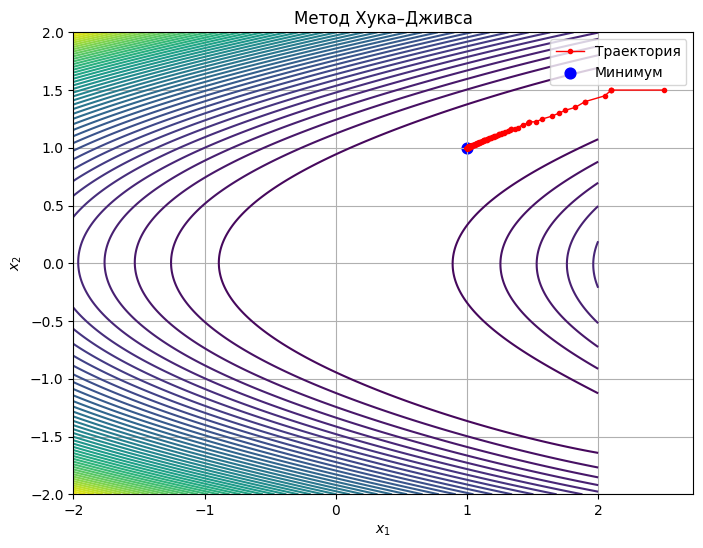

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return 100 * (x1 - x2**2)**2 + (x1**2 - x2)**2

def exploratory_search(f, x, step):
    x_new = x.copy()
    for i in range(len(x)):
        f_curr = f(*x_new)
        x_new[i] += step
        if f(*x_new) >= f_curr:
            x_new[i] -= 2 * step
            if f(*x_new) >= f_curr:
                x_new[i] += step
    return x_new

def hooke_jeeves(f, x0, step_size=0.2, alpha=1.0, tol=1e-5, max_iter=10000):
    x_base = np.array(x0, dtype=float)
    x_new = x_base.copy()
    trajectory = [x_base.copy()]
    iter_count = 0

    while step_size > tol and iter_count < max_iter:
        x_explore = exploratory_search(f, x_base, step_size)

        if np.allclose(x_explore, x_base):  # нет улучшения
            step_size /= 2
        else:
            direction = x_explore - x_base
            x_base = x_explore
            x_try = x_explore + alpha * direction
            x_try_explore = exploratory_search(f, x_try, step_size)
            if f(*x_try_explore) < f(*x_explore):
                x_base = x_try_explore

        trajectory.append(x_base.copy())
        iter_count += 1

    return x_base, f(*x_base), iter_count, np.array(trajectory)

x0 = [2.5, 1.5]
xmin, fmin, iterations, traj = hooke_jeeves(f, x0)
print("Точка минимума:", xmin)
print("Значение функции:", fmin)
print("Итераций:", iterations)

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(traj[:, 0], traj[:, 1], marker='o', color='red', markersize=3, linewidth=1, label='Траектория')
plt.scatter(xmin[0], xmin[1], color='blue', s=60, label='Минимум')
plt.title("Метод Хука–Дживса")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.show()

